In [14]:
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from Class_Eda import Eda

#Instanciamos el objeto Eda
objEda = Eda()

#Inicializamos los parámetros principales (por el momento, sólo es uno: la ruta de la fuente de datos)
objEda.strRutaDataSource='Transit_modeling.csv'

#Proceso de carga 
objEda.Cargar_Datos()


In [15]:
#Proceso de limpieza
objEda.Limpiar_Datos()

In [16]:
#Guardamos el arreglo en la nueva columna
objEda.pdDataSet['y'] = objEda.pdDataSet.apply(lambda x: (x.etiqueta1), axis=1)

In [13]:
#objEda.pdDataSet.head()

,fecha,day_sem,id_operador,id_avion,num_vuelo,origen,destino,horasalidaf,salida_realf,tiempo_trans_vuelo,...,ind_retraso1,ind_retraso2,ind_retraso3,efecto,sum_efectos_domino,tot_sum_domino,vuelos_afectados,year,etiqueta1,y
0,02jan2016,f:sabado,wn,7819a,6308,mdw,pit,5:45:00,5:43:00,80,...,0,NaN,NaN,sin_efecto,NaN,NaN,NaN,2016,0,0
1,02jan2016,f:sabado,wn,7819a,6308,pit,bwi,9:00:00,9:00:00,65,...,0,0.0,0.0,sin_efecto,NaN,NaN,NaN,2016,0,0
2,02jan2016,f:sabado,wn,7819a,4917,bwi,pit,10:45:00,10:40:00,60,...,0,0.0,0.0,sin_efecto,NaN,NaN,NaN,2016,0,0
3,02jan2016,f:sabado,wn,7819a,6469,pit,bwi,12:20:00,12:26:00,60,...,1,0.0,0.0,sin_efecto,1.0,2.0,2.0,2016,0,0
4,02jan2016,f:sabado,wn,7819a,4870,bwi,dtw,13:45:00,14:05:00,95,...,1,1.0,1.0,domino,1.0,2.0,1.0,2016,0,0


In [17]:
################## Eliminamos las columnas
objEda.pdDataSet = objEda.pdDataSet.drop(['fecha'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['id_operador'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['salida_realf'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['bandera_delay'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['ind_retraso2'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['ind_retraso3'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['sum_efectos_domino'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['tot_sum_domino'], axis=1)

objEda.pdDataSet = objEda.pdDataSet.drop(['tiempo_trans_vuelo'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['distancia_millas'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['delay'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['ind_retraso1'], axis=1)

objEda.pdDataSet = objEda.pdDataSet.drop(['efecto'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['year'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['etiqueta1'], axis=1)

#Variables a incluir que se eliminan en esta prueba:
objEda.pdDataSet = objEda.pdDataSet.drop(['horasalidaf'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['hora_llegada_progf'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['num_vuelo'], axis=1)
objEda.pdDataSet = objEda.pdDataSet.drop(['id_avion'], axis=1)

In [18]:
objEda.pdDataSet.head()
#Feature Engeenering 2
#objEda.Imprimir_Variables('Num')
#objEda.Imprimir_Variables('Cat')

,day_sem,origen,destino,count,max,nvue_falt,vuelos_afectados,y
0,f:sabado,mdw,pit,1,8,7,NaN,0
1,f:sabado,pit,bwi,2,8,6,NaN,0
2,f:sabado,bwi,pit,3,8,5,NaN,0
3,f:sabado,pit,bwi,4,8,4,2.0,0
4,f:sabado,bwi,dtw,5,8,3,1.0,0


In [27]:
################## Preparación LabelEncoder
import numpy as np
objEda.npLabelEncoderFeat=np.array([])
#objEda.Agregar_Features_LabelEnc('day_sem')
#objEda.Agregar_Features_LabelEnc('origen')
objEda.Agregar_Features_LabelEnc('destino')

#Mostramos el dataSet Auxiliar para ver que aún no ocurre ningún cambio
objEda.LabelEncoder_OneHotEncoder()

#objEda.Borrar_Cols_Base_LabelEnc()
#objEda.Borrar_Cols_Inter_LabelEnc()

In [29]:
objEda.Borrar_Cols_Base_LabelEnc()
objEda.Borrar_Cols_Inter_LabelEnc()

In [32]:
#objEda.pdDataSet.tail()
objEda.pdDataSet

,count,max,nvue_falt,vuelos_afectados,y,day_sem_0,day_sem_1,day_sem_2,day_sem_3,day_sem_4,...,destino_76,destino_77,destino_78,destino_79,destino_80,destino_81,destino_82,destino_83,destino_84,destino_85
0,1,8,7,NaN,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,8,6,NaN,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8,5,NaN,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8,4,2.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,8,3,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197358,1,5,4,NaN,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197359,2,5,3,NaN,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197360,3,5,2,NaN,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197361,4,5,1,NaN,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
################## Separamos las features de lo que vamos a predecir
pdX, pdY = objEda.SepararFeaturesYPred('y')

In [34]:
################## Separamos nuestros datos en entrenamiento y pruebas utilizando la proporción 80-20
objEda.Generar_Train_Test(pdX, pdY, 0.2)

In [35]:
################## Preparamos las variables que imputaremos
objEda.listTransform=[''] #Limpiamos la propiedad de lista de features a imputar
objEda.Agregar_Features_Transform('median', 'vuelos_afectados') #no hizo nada porque están como NaN

################## Imputamos sobre el conjunto de entrenamiento y prueba
objEda.X_train = objEda.Imputar_Features(objEda.X_train)
objEda.X_test = objEda.Imputar_Features(objEda.X_test)

In [22]:
objEda.X_test

array([[1., 2., 5., ..., 0., 0., 0.],
       [1., 2., 6., ..., 0., 0., 0.],
       [1., 5., 6., ..., 0., 0., 0.],
       ...,
       [2., 3., 7., ..., 0., 0., 0.],
       [2., 2., 5., ..., 0., 0., 0.],
       [1., 4., 7., ..., 0., 0., 0.]])

In [23]:
objEda.X_train

array([[2., 4., 6., ..., 0., 0., 0.],
       [1., 3., 6., ..., 0., 0., 0.],
       [1., 3., 4., ..., 0., 0., 0.],
       ...,
       [0., 8., 8., ..., 0., 0., 0.],
       [0., 4., 4., ..., 0., 0., 0.],
       [1., 2., 5., ..., 0., 0., 0.]])

In [38]:
## Feature Selection
################## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Se crea el clasificador Random Forest
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

# Se entrea al clasificador
clf.fit(objEda.X_train, objEda.Y_train)

# Se imprimen los nombres y "gini importance" para cada variable
for feature in zip(objEda.pdDataSet.columns, clf.feature_importances_):
    print(feature)
    
# Se crea un objecto selector que utilizará el clasificador random forest para
# identificar variables que tienen una importancia mayor a cierto valor

sfm = SelectFromModel(clf, threshold=0.05)

# Se entrena al selector
sfm.fit(objEda.X_train, objEda.Y_train)

arrIndiceFeaturesAdec = sfm.get_support(indices=True)

# Se imprimen los nombres de las variables más importantes
for nbrIndex in arrIndiceFeaturesAdec:
    print(objEda.pdDataSet.columns[nbrIndex])

C:\Users\cynthia\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


('count', 0.4155419378830971)
('max', 0.034953894973740816)
('nvue_falt', 0.034335078060954385)
('vuelos_afectados', 0.041146447220211754)
('y', 0.014703052545078999)
('day_sem_0', 0.01247407848404809)
('day_sem_1', 0.014586969674417999)
('day_sem_2', 0.01581018904935067)
('day_sem_3', 0.01664454374162927)
('day_sem_4', 0.010609726177660405)
('day_sem_5', 0.012879459226211493)
('day_sem_6', 0.002997838464338262)
('origen_0', 0.0008043107833247308)
('origen_1', 0.0002376968723864443)
('origen_2', 0.0055159974416341215)
('origen_3', 0.0030057155317715096)
('origen_4', 0.001997729950341985)
('origen_5', 0.0007614827905477611)
('origen_6', 0.003856025890759225)
('origen_7', 0.0009038043081826458)
('origen_8', 0.0020593097641933757)
('origen_9', 0.0014609686997946604)
('origen_10', 0.002259487692851226)
('origen_11', 0.007186048052413243)
('origen_12', 0.0012943748281640292)
('origen_13', 0.0006661109556235403)
('origen_14', 0.0015108911645446861)
('origen_15', 0.00048585942709433136)
('ori

C:\Users\cynthia\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


count


In [39]:
arrIndiceFeaturesAdec

array([0], dtype=int64)

In [36]:
#Magic loop
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

###########################################

def prepModelos(npModelos):
    
    npArrayModelos=np.array([])
    for strModelo in npModelos:
        
        if strModelo=='DECTREE':
            classifier = tree.DecisionTreeClassifier()
        if strModelo=='RANDOMF':
            classifier = RandomForestClassifier()
        if strModelo=='XGBOOST':
            classifier = GradientBoostingClassifier()
        
        npArrayModelos=np.append(npArrayModelos, classifier)
        
    return npArrayModelos

def magic_loop2(npClassifier, npDictHyperParams, X_train, Y_train, nbrCv):
    
    npResultados=np.array([])
    for i, classifier in enumerate(npClassifier):
        dictHyperParams=npDictHyperParams[i]
        
        grid_search = GridSearchCV(classifier
                                  ,dictHyperParams
                                  ,scoring='f1'
                                  ,cv=nbrCv
                                  ,n_jobs=-1
                                  ,verbose=3
                                  )
        grid_search.fit(X_train, Y_train)
        npResultados=np.append(npResultados, grid_search)
        
        #de los valores posibles que pusimos en el grid, cuáles fueron los mejores
        print('grid_search.best_params_: ', grid_search.best_params_)

        #mejor score asociado a los modelos generados con los diferentes hiperparametros
        #corresponde al promedio de los scores generados con los cv
        print('grid_search.best_score_: ', grid_search.best_score_)

        
    return npResultados

def InstanciarModeloDinamico(npModelos, nbrIndice, dictParametros):
    
    strModelo = npModelos[nbrIndice]
    
    if strModelo=='DECTREE':
        classifier = tree.DecisionTreeClassifier(**dictParametros)
    if strModelo=='RANDOMF':
        classifier = RandomForestClassifier(**dictParametros)
    if strModelo=='XGBOOST':
        classifier = GradientBoostingClassifier(**dictParametros)
    
    
    return classifier

In [ ]:
#Hyperparámetros

In [37]:
####### Se crean los hyperparámetros con los que se trabajará
### Arreglo de diccionarios por modelo (deben ir en el órden que se ejecutarán)
npDictHiperParam=np.array([])


### Parametrización para Árboles
dictHyperParams = {'max_depth': [4] #[4,7]
                    ,'min_samples_split': [4] #[4,16]
                    ,'min_samples_leaf': [3] #[3,7]
                    ,'max_features': ['sqrt'] ##['sqrt','log2']
                    }
npDictHiperParam=np.append(npDictHiperParam, dictHyperParams)


### Parametrización para Bosques
dictHyperParams = {'n_estimators': [25] #Se redujo a 50
                      ,'max_depth':[4] #[4,7]
                      ,'max_features': ['sqrt'] ##['sqrt','log2']
                      ,'min_samples_split': [4] #[4,16]
                      ,'min_samples_leaf':[3]  #[3,7]
                      }
npDictHiperParam=np.append(npDictHiperParam, dictHyperParams)

### Parametrización para XGBoost
dictHyperParams = {'learning_rate': [0.25, 0.75]
                      ,'n_estimators': [25] #Se redujo a 50
                      ,'min_samples_split': [4] #[4,16]
                      ,'min_samples_leaf':[3] #[3,7]
                      ,'max_depth':[4] #[4,7] 
                      ,'max_features': ['sqrt']}
npDictHiperParam=np.append(npDictHiperParam, dictHyperParams)


### Se crean los modelos de clasificaión que se emplearán (en el mismo orden que los diccionarios)
npNombreModelos=np.array([])
npNombreModelos=np.append(npNombreModelos, 'DECTREE')
npNombreModelos=np.append(npNombreModelos, 'RANDOMF')
npNombreModelos=np.append(npNombreModelos, 'XGBOOST')

arrModelos=objEda.prepModelos(npNombreModelos)

### #Se corre el magic loop para realizar las predicciones con los parámetros previamente establecidos
npGridSearchCv = objEda.magic_loop2(arrModelos, npDictHiperParam, objEda.X_train, objEda.Y_train, 5)
#npArrAux

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.9s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished


grid_search.best_params_:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}
grid_search.best_score_:  0.00031974420463629094
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.2s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.9s finished
/Users/Marco/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


grid_search.best_params_:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 25}
grid_search.best_score_:  0.0
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   25.3s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.9s finished
/Users/Marco/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grid_search.best_params_:  {'learning_rate': 0.75, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 25}
grid_search.best_score_:  0.3021430888046722


In [38]:
npArrBestScores=np.array([])
npArrBestParams=np.array([])

# Barremos el arreglo de GridSearchCV´s para sacar los mejores scores y parámetros
for grid in npGridSearchCv:
    npArrBestScores=np.append(npArrBestScores,grid.best_score_)
    npArrBestParams=np.append(npArrBestParams,grid.best_params_)

# Obtenemos el índice del mejor score
nbrIndiceGanador=np.argmax(npArrBestScores, axis=0)

# Mostramos el modelo, parámetros y score ganador
print("Modelo ganador: \n", arrModelos[nbrIndiceGanador])

print("Score del modelo ganador: \n", npArrBestScores[nbrIndiceGanador])

print("Parámetros del modelo ganador: \n", npArrBestParams[nbrIndiceGanador])

Modelo ganador: 
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Score del modelo ganador: 
 0.3021430888046722
Parámetros del modelo ganador: 
 {'learning_rate': 0.75, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 25}


In [14]:
# Instanciamos dinámicamente el modelo que tuvo el mejor score, y le pasamos la lista de parámetros
modelo=objEda.InstanciarModeloDinamico(npNombreModelos, nbrIndiceGanador, npArrBestParams[nbrIndiceGanador])
modelo

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
# Ahora usaremos cross_val_predcit para que nos devuelva nuesto y_predcit
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(modelo, objEda.X_test, objEda.Y_test, cv=5)
y_pred

/Users/Marco/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Marco/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Marco/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Marco/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

array([0, 0, 0, ..., 0, 0, 1])

In [16]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[37313   536]
 [ 1207   417]]


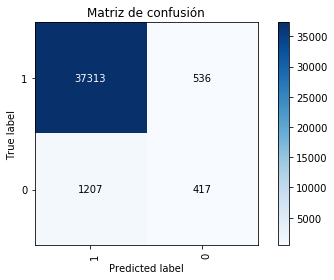

In [17]:
#PLot de la matriz de confusión normalizada
class_names = np.array([1,0])
plot_confusion_matrix(objEda.Y_test, y_pred, classes=class_names,normalize= False,
                      title='Matriz de confusión',cmap=plt.cm.Blues)

In [18]:
#Curva ROC
#Para poder graficar la ROC y AUc debemos obtener el vector de probabilidades para cada entrada del vector de prediccion
#Para esto realizamos lo siguiente:
y_prob = cross_val_predict(modelo, objEda.X_test, np.ravel(objEda.Y_test), cv=5,method='predict_proba')

#El vector prob consta de dos columnas, donde la que nos interesa es la segunda, la cual contiene la clase positiva y es la que utiliza 
#para decir si es 1 o 0 (redondeando)
y_prob = y_prob[:,1]
y_prob

array([6.80622544e-04, 1.71106170e-03, 1.26600460e-04, ...,
       2.94085875e-01, 3.44444285e-01, 1.30080277e-04])

In [19]:
from sklearn import metrics

#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(
        test_labels, test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return fig 

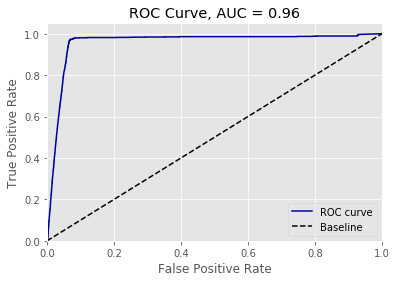

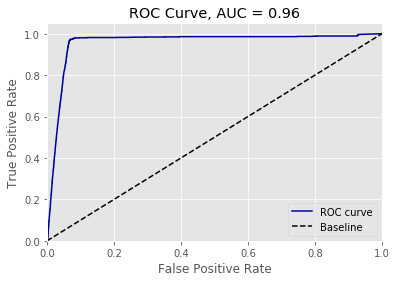

In [20]:
plot_ROC(objEda.Y_test, y_prob)

In [45]:
#arrModelos
#npArrBestScores#[nbrIndiceGanador]

#npArrBestParams#[nbrIndiceGanador]

#dictHyperParams

for grid in npGridSearchCv:
    #print(type(grid.estimator))
    print(grid.param_grid)
    print(type(grid.param_grid))
    print(type(str(grid.param_grid)))
    #print(grid.best_params_)
    #print(grid.best_score_)
    print('')

{'max_depth': [4], 'min_samples_split': [4], 'min_samples_leaf': [3], 'max_features': ['sqrt']}
<class 'dict'>
<class 'str'>

{'n_estimators': [25], 'max_depth': [4], 'max_features': ['sqrt'], 'min_samples_split': [4], 'min_samples_leaf': [3]}
<class 'dict'>
<class 'str'>

{'learning_rate': [0.25, 0.75], 'n_estimators': [25], 'min_samples_split': [4], 'min_samples_leaf': [3], 'max_depth': [4], 'max_features': ['sqrt']}
<class 'dict'>
<class 'str'>

